In [2]:
import glob
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import mpld3 
import seaborn as sns
import palettable.colorbrewer.diverging as pld

import numpy as np
import pandas as pd
from sklearn import preprocessing

from scipy import integrate  
import scipy.signal as scipy
from scipy.optimize import curve_fit

# from numpy import diff
# from numpy import gradient

In [3]:
## Plotting parameters

palette = pld.RdYlGn_4_r
cmap = palette.mpl_colormap
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


In [4]:
## Find the subfolders in the current working folder (cwd)
#cwd = os.getcwd()
cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20220916/'
length = 35
rate = '0500'
subfolder = glob.glob(cwd + f'/**{rate}**')
subfolder.sort()
print(*subfolder, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20220916/CsPbBr_0500_ZnI_40_15cm
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20220916/Cs_0500_I_40_20cm
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20220916/Cs_0500_I_40_25cm
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20220916/Cs_0500_I_40_30cm
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20220916/Cs_0500_I_40_35cm


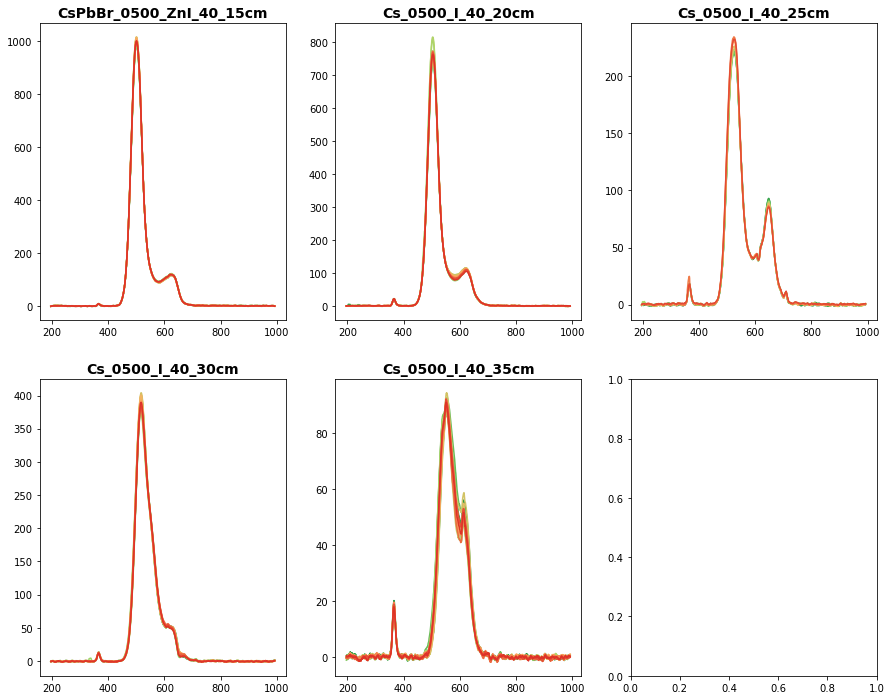

In [5]:
## Plot All PL profiles in each subfolder
f1, ax1 = plt.subplots(2, int(len(subfolder)/2)+1, figsize = (15, 12))
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})


## Wavelength range
w1 = 250
w2 = 1000

ax1 = ax1.flatten()
df = pd.DataFrame()
df_norm = pd.DataFrame()
df_norm2 = pd.DataFrame()

for i in range(len(subfolder)):
# for i in range(1):
    data_files = glob.glob(subfolder[i] + '/**Subt**.txt')
    data_files.sort()
    k1 = 0
    k2 = len(data_files)
    color_idx = np.linspace(0, 1, k2-k1+1)
    ax1[i].set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    df_i = pd.DataFrame()
    for j in range(k1, k2):
        df_j = pd.read_csv(data_files[j], names=['wavelength', 'intensity'], skiprows=14, sep='\t')
        ax1[i].plot(df_j.wavelength, df_j.intensity, color=cmap(color_idx[j-k1]))
        #df_i[f'Iten_{j}'] = df_j.intensity
        df_i = pd.concat([df_i, df_j.intensity], axis=1, ignore_index=True)
    
    df[f'{os.path.basename(subfolder[i])}']= df_i.mean(axis=1)
    #df_norm[f'{os.path.basename(subfolder[i])}']= df_i.mean(axis=1) / df_i.mean(axis=1).sum(axis=0)
    df_norm[f'{os.path.basename(subfolder[i])}']= df[f'{os.path.basename(subfolder[i])}'].loc[w1:w2] / df[f'{os.path.basename(subfolder[i])}'].loc[w1:w2].sum(axis=0)
    
    x = df[f'{os.path.basename(subfolder[i])}'].loc[w1:w2].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x.reshape(-1,1))
    df_norm2[f'{os.path.basename(subfolder[i])}']= x_scaled.flatten()

    
df['wavelength'] = df_j.wavelength
df_norm['wavelength'] = df_j.wavelength.loc[w1:w2]
#df_norm2['wavelength'] = df_j.wavelength.loc[w1:w2]
df_norm2.loc[0:(w2-w1), 'wavelength'] = df_j.wavelength.loc[w1:w2].values

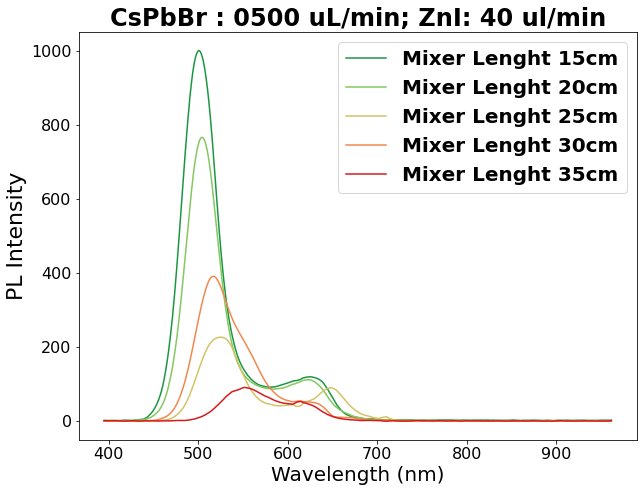

In [10]:
## Plot average PL profiles in each subfolder
f2, ax2 = plt.subplots(1, 1, figsize = (10, 7.5))
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

k = len(subfolder)
color_idx = np.linspace(0, 1, k)
for i in range(len(subfolder)):
    #ax2.set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    #ax2.plot(df.wavelength, getattr(df, os.path.basename(subfolder[i])), color=cmap(color_idx[i]), label=os.path.basename(subfolder[i]))
    #label = 'CsPbBr ' + os.path.basename(subfolder[i]).split('_')[1] + ' uL/min + ' + 'ZnI ' + os.path.basename(subfolder[i]).split('_')[3] + ' uL/min'
    label = 'Mixer Lenght ' + os.path.basename(subfolder[i]).split('_')[-1]
    ax2.plot(df.wavelength.loc[w1:w2], getattr(df.loc[w1:w2], os.path.basename(subfolder[i])), color=cmap(color_idx[i]), label=label)


ax2.set_xlabel('Wavelength (nm)', fontdict={'size': 20})
ax2.set_ylabel('PL Intensity', fontdict={'size': 22})
ax2.tick_params(axis='both', labelsize=16)
legend_properties = {'weight':'bold', 'size':20}    
ax2.legend(fontsize=legendsize, prop=legend_properties, loc='upper right')
ax2.set_title(f'CsPbBr : {rate} uL/min;' + ' ZnI: 40 ul/min', fontdict={'weight':'bold', 'size':24})

fn = f'20220916_CsPbBr_ZnI_{rate}uLmin.png'
fout = cwd + fn
plt.savefig(fout, dpi = 600,  transparent=False)


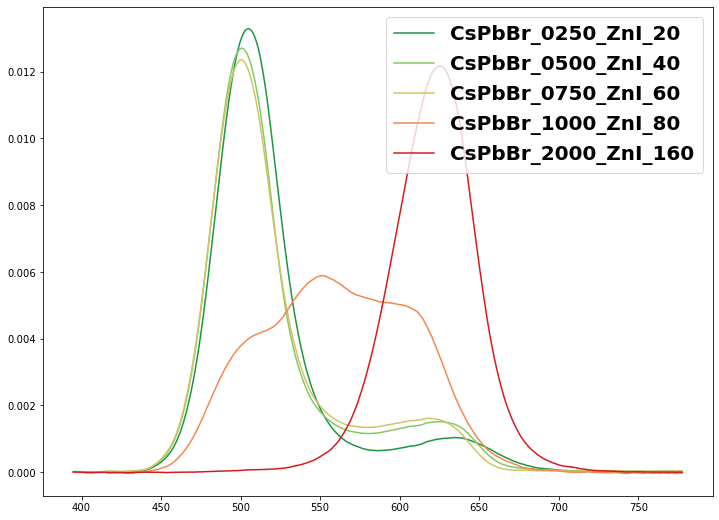

In [9]:
## Plot Normalized (by summation) PL profiles in each subfolder
f3, ax3 = plt.subplots(1, 1, figsize = (12, 9))
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

k = len(subfolder)
color_idx = np.linspace(0, 1, k)
for i in range(len(subfolder)):
    #ax2.set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    ax3.plot(df_norm.wavelength, getattr(df_norm, os.path.basename(subfolder[i])), color=cmap(color_idx[i]), label=os.path.basename(subfolder[i]))

legend_properties = {'weight':'bold', 'size':20}    
ax3.legend(fontsize=legendsize, prop=legend_properties)

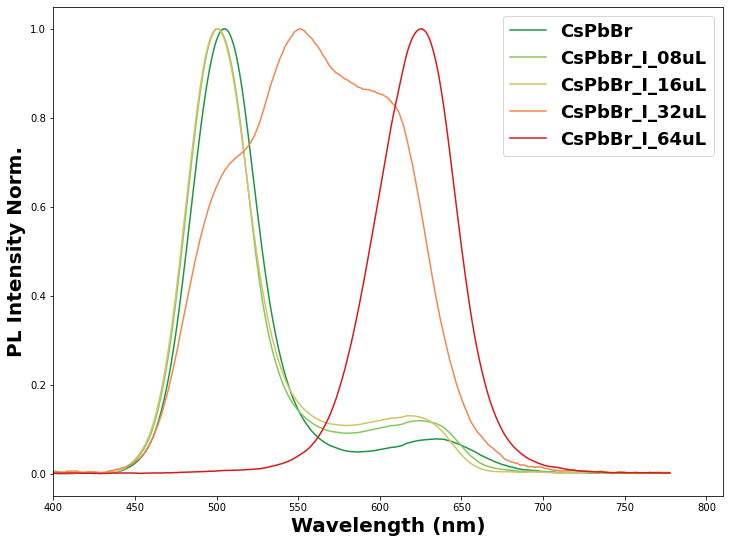

In [10]:
## Plot Normalized (by Max-min) PL profiles in each subfolder
f4, ax4 = plt.subplots(1, 1, figsize = (12, 9))
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

# mpld3.disable_notebook()
label = ['CsPbBr', 'CsPbBr_I_08uL', 'CsPbBr_I_16uL', 'CsPbBr_I_32uL', 'CsPbBr_I_64uL']
k = len(subfolder)
color_idx = np.linspace(0, 1, k)
for i in range(len(subfolder)):
    #ax2.set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    ax4.plot(df_norm2.wavelength, getattr(df_norm2, os.path.basename(subfolder[i])), color=cmap(color_idx[i]), label=label[i])

legend_properties = {'weight':'bold', 'size':18}    
ax4.legend(prop=legend_properties)

ax4.set_xlim(400, 810)
ax4.set_xlabel('Wavelength (nm)', fontsize=labelsize, fontweight=fontweight)
ax4.set_ylabel('PL Intensity Norm.', fontsize=labelsize, fontweight=fontweight)

imag_name = '20220630_PL_CsPbBr_I.png'
#plt.savefig(cwd + '/' + imag_name, dpi = 300,  transparent=False)